#### Imorting required libraries

In [45]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing a 311 NYC service request.

In [46]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
data.shape

(300698, 53)

In [85]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,Day,Weekend
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2.302083,4,0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",3.594444,4,0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",12.146528,4,0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",19.384722,4,0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",8.626389,4,0


#### Data Cleaning

In [49]:
#Checking Null values column wise
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [87]:
data.isnull().mean()

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.000000
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.019793
Location Type                     0.000429
Incident Zip                      0.001698
Incident Address                  0.148717
Street Name                       0.148717
Cross Street 1                    0.159322
Cross Street 2                    0.159623
Address Type                      0.002368
City                              0.001695
Facility Type                     0.000050
Status                            0.000000
Due Date                          0.000003
Resolution Description            0.000000
Resolution Action Updated Date    0.000131
Community Board                   0.000000
Borough                           0.000000
X Coordinate (State Plane)        0.004797
Y Coordinat

In [50]:
data.shape

(300698, 53)

In [51]:
#Dropping columns with more than 80% null values
data = data.loc[:, data.isnull().mean() < .8]

In [52]:
data.shape

(300698, 39)

In [53]:
#Dropping rows with more than 50% of null values
data.dropna(thresh=20,inplace=True)

In [54]:
data.shape

(300698, 39)

In [55]:
#Dropping rows with null values for specific columns
data.dropna(subset=['Closed Date'],inplace=True) #We are using this column for calculating time elpase b/w request creation and closed

In [56]:
data.shape

(298534, 39)

#### Converting Created Date, Closed Date to Datatime data types

In [57]:
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])

#### Creating New column with elapsed time b/w creation and closed

In [58]:
data['Request_Closing_Time'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds()/(60*24)

#### Request_Closing_Time by Location and Complaint Type (Grouping Data)

In [59]:
df = data.loc[:,['Location','Complaint Type','Request_Closing_Time']]
df = df.groupby(['Location','Complaint Type']).mean() #data['Request_Closing_Time'])

In [60]:
df = df.sort_values(by='Request_Closing_Time',ascending=True)
df

,,Request_Closing_Time
Location,Complaint Type,
"(40.678429539269835, -73.98361397723242)",Noise - Commercial,0.109028
"(40.76848580086362, -73.91235250532725)",Noise - Vehicle,0.113194
"(40.69371028050496, -73.95499211670034)",Illegal Parking,0.115972
"(40.71598512070559, -73.9509008064274)",Illegal Parking,0.118750
"(40.72895633655987, -74.00074325193769)",Noise - Commercial,0.125000
...,...,...
"(40.64465625507198, -73.95663234950166)",Derelict Vehicle,501.515625
"(40.64466438582295, -73.95635848114169)",Derelict Vehicle,558.379167
"(40.64496727639598, -73.95897801142875)",Derelict Vehicle,558.425000


### Major insights from the Data

#### 1. Based on Complaint types

<AxesSubplot:>

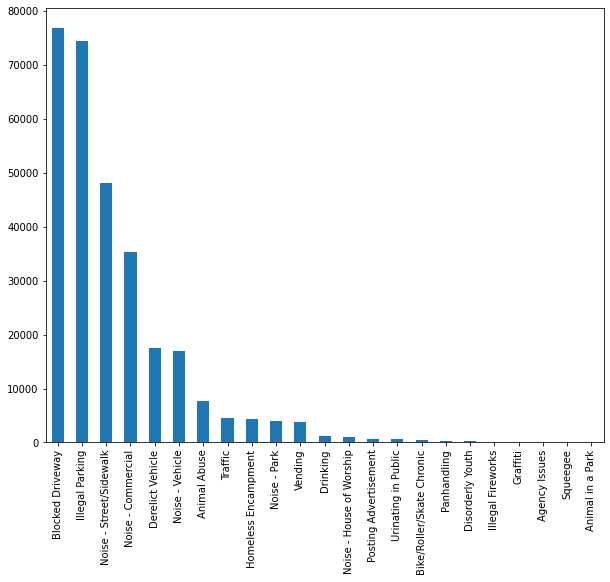

In [61]:
plt.figure(figsize=(10,8))
data['Complaint Type'].value_counts().plot(kind='bar',)

***Insight: Majority of the complaints belong to "Blocked Driveway", "Illegal Parking", "Noise-Street/Sidewalk"

#### 2. Average time taken to close the complaint - Complaint wise

In [62]:
df1 = data.loc[:,['Complaint Type','Request_Closing_Time']]
df1 = df1.groupby('Complaint Type').mean()

<AxesSubplot:xlabel='Complaint Type'>

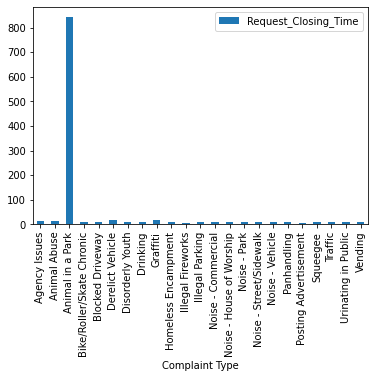

In [63]:
df1.plot(kind = 'bar')

***Insight: "Animal in a Park" complaint took so much time to close compare to other complaints

In [64]:
#I will plot same bar char without "Animal in a Park"
df1 = df1.drop('Animal in a Park')

<AxesSubplot:xlabel='Complaint Type'>

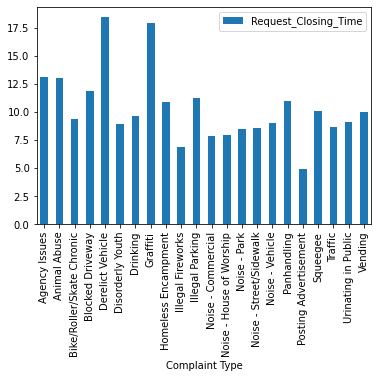

In [65]:
df1.plot(kind = 'bar')

*** Complaints "Derelict Vechicle" and "Graffiti" taking more time compare to other complaints

#### 3. Complaints on Distribution on Weekday/Weekend basis

In [66]:
data['Day'] = data['Created Date'].apply(lambda x: x.isoweekday())

In [67]:
data['Weekend'] = data['Day'].apply(lambda x: 1 if x == (6|7) else 0)

In [68]:
weekday_avg_complaints = data.Weekend.value_counts()[0]/len(data)
weekend_avg_complaints = data.Weekend.value_counts()[1]/len(data)

<BarContainer object of 2 artists>

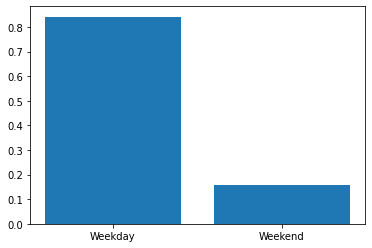

In [69]:
day = [weekday_avg_complaints,weekend_avg_complaints]
plt.bar(['Weekday',"Weekend"],day)

***Insights: More number of complaints were registered on Weekday compare to Weekend

#### 4. Complaints on City Level

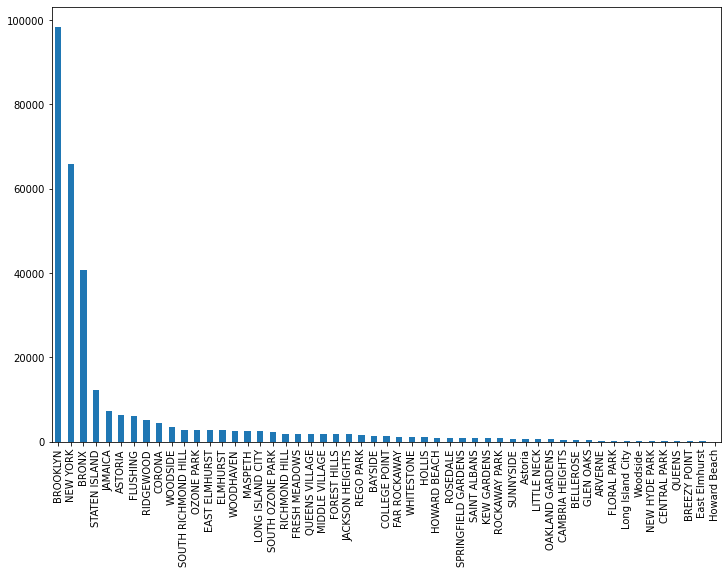

In [70]:
plt.figure(figsize=(12,8))
data['City'].value_counts().plot(kind='bar')
plt.xticks(rotation=90,size=10)
plt.show()

***Insights: More than 70% of complaints are raised from cities "Brooklyn", "New York" and "Bronx"

## Hypothesis Testing

### 1. Whether the average response time across complaint types is similar or not (overall)

#### Null hypothesis(Ho) = Average respone time across complaint types is similar

#### Alternate hypothesis(H1) = Average response time across compaint is not similar

In [71]:
data['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [72]:
#Stastistical test "Annova" will be used to compare the means of two or more groups with same number of sample sizes
#So I will take 10 samples from each complaint exlcuding last three complaints since their size is less than 10

In [73]:
Complaint_list = data['Complaint Type'].unique().tolist()

In [74]:
Complaint_list = Complaint_list[:-3]#Excluding complaints which have size less than 10
Complaint_list

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Noise - Park',
 'Homeless Encampment',
 'Urinating in Public',
 'Graffiti',
 'Disorderly Youth',
 'Illegal Fireworks']

In [75]:
temp_list = []
for i in Complaint_list:
    temp_list = temp_list + (data[data['Complaint Type'] == i]['Request_Closing_Time'][0:10].tolist())

In [76]:
#Created list for 20 complaints
x1 = temp_list[0:10]
x2 = temp_list[10:20]
x3 = temp_list[20:30]
x4 = temp_list[30:40]
x5 = temp_list[40:50]
x6 = temp_list[50:60]
x7 = temp_list[60:70]
x8 = temp_list[70:80]
x9 = temp_list[80:90]
x10 = temp_list[90:100]
x11 = temp_list[100:110]
x12 = temp_list[110:120]
x13 = temp_list[120:130]
x14 = temp_list[130:140]
x15 = temp_list[140:150]
x16 = temp_list[150:160]
x17 = temp_list[160:170]
x18 = temp_list[170:180]
x19 = temp_list[180:190]
x20 = temp_list[190:200]

In [77]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20)
print(fvalue, pvalue)

2.274914912564007 0.0027960269067375827


#### Conclusion: P value is 0.002 less than 0.05 hence rejected Null hypothesis and accepted alternate hypothesis (Average response time across compaint is not similar)

### 2. Are the type of complaint or service requested and location related?

#### Null Hypotehsis: Type of Complaint and Location are related
#### Alterante Hypothesis: Type of Complaint and Location are not related

In [78]:
city_names =  (data['City'].value_counts()[0:10]).index
city_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA',
       'FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE'],
      dtype='object')

In [79]:
pd.crosstab(data['Complaint Type'], data['City'], margins=True)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,All
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,55,26,24,557,35,28,45,69,0,7767
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,1,1,0,7,2,4,2,4,0,422
Blocked Driveway,35,2618,116,377,95,3,12754,28147,147,0,...,942,1548,262,2142,206,208,1059,1613,11,76752
Derelict Vehicle,27,351,12,198,89,3,1952,5179,115,0,...,358,289,210,1766,10,227,308,247,2,17542
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,...,2,2,0,23,2,1,0,1,0,286
Drinking,1,35,0,1,1,1,188,257,0,0,...,13,23,6,175,10,2,3,15,0,1272
Graffiti,1,4,0,3,0,0,9,43,0,0,...,0,0,0,2,1,1,0,3,0,113
Homeless Encampment,4,32,0,2,1,0,247,857,5,0,...,4,11,5,71,11,0,9,33,0,4415


In [80]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(data['Complaint Type'], data['City']))

In [81]:
print("Chi-Square value is: " + str(ch2))
print("P-Value is: " + str(p_value))

Chi-Square value is: 119737.34755994167
P-Value is: 0.0


#### Conclusion: P value is 0.0 less than 0.05 hence rejected Null hypothesis and accepted alternate hypothesis (Type of Complaint and Location are not related)